In [133]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
#import csv

# Dataset loading

In [134]:
datasetraw = pd.read_csv('../Y3 - Sample data/Z1 - dataset.csv', index_col = 0,)
print('dataset shape:', datasetraw.shape)
datasetraw.head()

dataset shape: (11399, 25)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,deformation_length,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,radius_approx,bend_edge_distance,bend_edge_angle,bend_edge_length
l1600360_flat1,3178.4895632067255,9,0,285678.08047400013,431798.45800000004,722.071,598.0,320484.60737549997,286893.71544200013,4.0,...,"[276.78907664300004, 661.9399541592159, 661.93...",NaN,"[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...",True,"[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,..."
l1600470_flat1,317.1145043012803,1,0,3403.1382480000025,3500.0,140.0,25.0,3403.138248000001,3403.1382480000025,10.0,...,[],NaN,[],[],[],[],False,[],[],[]
l1600600_flat1,3710.6279999999997,1,0,522587.826,522587.82600000006,1509.0,346.314,522587.82600000006,522587.826,3.0,...,"[1509.0, 1509.0]",NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1519.0, 1519.0]",True,"[[216.174, 121.89999999999999, 0.8649999999999...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1509.0, 94.274, 118.44, 129.276, 1509.0, 129..."
l1600610_flat1,3232.6279999999997,1,0,439818.7799999999,439818.78,1270.0,346.314,439818.78,439818.7799999999,3.0,...,"[1270.0, 1270.0]",NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1280.0, 1280.0]",True,"[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1270.0, 94.274, 118.44, 129.276, 1270.0, 129..."
l1600620_flat1,2972.6279999999997,1,0,394797.96,394797.96,1140.0,346.314,394797.96,394797.96,3.0,...,"[1140.0, 1140.0]",NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1150.0, 1150.0]",True,"[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1140.0, 94.274, 118.44, 129.276, 1140.0, 129..."


In [135]:
datasetraw.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'unit', 'material', 'bend_radius', 'bend_angle',
       'bend_direction', 'deformation_length', 'possible_imperfection',
       'bend_bend_distance', 'bend_bend_angle', 'merged_bend',
       'punch_length', 'radius_approx', 'bend_edge_distance',
       'bend_edge_angle', 'bend_edge_length'], dtype=object)

In [136]:
print('parts with error', datasetraw[datasetraw['cut_length'] == 'ERROR'].shape[0])
print('parts error free', datasetraw[datasetraw['cut_length'] != 'ERROR'].shape[0])

parts with error 545
parts error free 10854


In [137]:
#Dataset cleaning
dataset = datasetraw[datasetraw['cut_length'] != 'ERROR']
dataset.head()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,deformation_length,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,radius_approx,bend_edge_distance,bend_edge_angle,bend_edge_length
l1600360_flat1,3178.4895632067255,9,0,285678.08047400013,431798.45800000004,722.071,598.0,320484.60737549997,286893.71544200013,4.0,...,"[276.78907664300004, 661.9399541592159, 661.93...",NaN,"[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...",True,"[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,..."
l1600470_flat1,317.1145043012803,1,0,3403.1382480000025,3500.0,140.0,25.0,3403.138248000001,3403.1382480000025,10.0,...,[],NaN,[],[],[],[],False,[],[],[]
l1600600_flat1,3710.6279999999997,1,0,522587.826,522587.82600000006,1509.0,346.314,522587.82600000006,522587.826,3.0,...,"[1509.0, 1509.0]",NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1519.0, 1519.0]",True,"[[216.174, 121.89999999999999, 0.8649999999999...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1509.0, 94.274, 118.44, 129.276, 1509.0, 129..."
l1600610_flat1,3232.6279999999997,1,0,439818.7799999999,439818.78,1270.0,346.314,439818.78,439818.7799999999,3.0,...,"[1270.0, 1270.0]",NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1280.0, 1280.0]",True,"[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1270.0, 94.274, 118.44, 129.276, 1270.0, 129..."
l1600620_flat1,2972.6279999999997,1,0,394797.96,394797.96,1140.0,346.314,394797.96,394797.96,3.0,...,"[1140.0, 1140.0]",NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1150.0, 1150.0]",True,"[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1140.0, 94.274, 118.44, 129.276, 1140.0, 129..."


In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10854 entries, l1600360_flat1 to l8841860_flat1
Data columns (total 25 columns):
cut_length                10854 non-null object
num_closed_patterns       10854 non-null object
num_open_patterns         10854 non-null object
total_area                10854 non-null object
minimum_rectangle_area    10854 non-null object
minimum_rectangle_dim1    10854 non-null object
minimum_rectangle_dim2    10854 non-null object
convex_hull_area          10854 non-null object
no_hole_area              10854 non-null object
thickness                 9508 non-null object
unit                      10854 non-null object
material                  10854 non-null object
bend_radius               10854 non-null object
bend_angle                10854 non-null object
bend_direction            10854 non-null object
deformation_length        10854 non-null object
possible_imperfection     452 non-null object
bend_bend_distance        10854 non-null object
bend_bend_ang

In [139]:
dataset.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'unit', 'material', 'bend_radius', 'bend_angle',
       'bend_direction', 'deformation_length', 'possible_imperfection',
       'bend_bend_distance', 'bend_bend_angle', 'merged_bend',
       'punch_length', 'radius_approx', 'bend_edge_distance',
       'bend_edge_angle', 'bend_edge_length'], dtype=object)

In [140]:
tointeger = ['num_closed_patterns', 'num_open_patterns']
tofloat = ['cut_length', 'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
           'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area', 'thickness',]

for column in tointeger:
    dataset[column] = pd.to_numeric(dataset[column], downcast='integer', errors='ignore')
for column in tofloat:
    dataset[column] = pd.to_numeric(dataset[column], downcast='float', errors='ignore')

/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
dataset.describe()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness
count,10854.000000,10854.000000,10854.000000,1.085400e+04,1.085400e+04,10854.000000,10854.000000,1.085400e+04,1.085400e+04,9508.000000
mean,1740.906372,5.906578,0.195688,9.972942e+04,1.485201e+05,484.922974,187.657196,1.243932e+05,1.068254e+05,7.095702
std,2055.853760,14.958419,1.287422,2.948277e+05,3.710792e+05,553.808228,177.905029,3.284348e+05,3.031351e+05,4.585826
min,2.792447,1.000000,0.000000,-8.792658e+05,5.580000e-04,0.463315,0.001204,2.790000e-04,0.000000e+00,0.500000
25%,616.134781,2.000000,0.000000,8.850511e+03,1.408271e+04,171.041248,73.000000,1.167796e+04,1.023573e+04,4.000000
50%,1144.147095,3.000000,0.000000,2.682191e+04,4.355736e+04,314.010849,139.856918,3.539804e+04,3.002521e+04,6.000000
75%,2092.935181,6.000000,0.000000,7.377335e+04,1.252165e+05,569.821487,237.247131,1.013017e+05,8.073584e+04,8.000000
max,49991.109375,409.000000,33.000000,5.504340e+06,7.921864e+06,4441.000000,1980.297363,5.885496e+06,5.644812e+06,90.000000


In [142]:
#All the parts must be bigger that a 20 mm square
dataset = dataset[dataset['total_area'] > 20*20]
dataset.shape

(10454, 25)

# Targets loading

In [143]:
priceset = pd.read_excel('../Y3 - Sample data/Valorisation_codes_L.xls')
print(priceset.shape)
priceset.head()

(31067, 7)


,VERSION,COSTE,COART,TPPRX,DTPRP,VAMAT,VALAJOUT
0,VALIDE,K,LPL0100,K,200901,15.58,0.0
1,VALIDE,K,LPL0120,K,200901,516.39,0.0
2,VALIDE,K,LPL0120A,K,200901,596.12,0.3
3,VALIDE,K,LPL0130A,K,200901,0.00,0.0
4,VALIDE,K,LPL0140A,K,200901,9.84,0.0


In [144]:
priceset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31067 entries, 0 to 31066
Data columns (total 7 columns):
VERSION     31067 non-null object
COSTE       31067 non-null object
COART       31067 non-null object
TPPRX       31067 non-null object
DTPRP       31067 non-null int64
VAMAT       31067 non-null float64
VALAJOUT    31067 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.7+ MB


In [145]:
#Date conversion
priceset['VALIDDATE'] = priceset['DTPRP'].apply(lambda x:pd.to_datetime(x, format='%Y%m', errors='ignore'))
priceset.head()

,VERSION,COSTE,COART,TPPRX,DTPRP,VAMAT,VALAJOUT,VALIDDATE
0,VALIDE,K,LPL0100,K,200901,15.58,0.0,2009-01-01
1,VALIDE,K,LPL0120,K,200901,516.39,0.0,2009-01-01
2,VALIDE,K,LPL0120A,K,200901,596.12,0.3,2009-01-01
3,VALIDE,K,LPL0130A,K,200901,0.00,0.0,2009-01-01
4,VALIDE,K,LPL0140A,K,200901,9.84,0.0,2009-01-01


In [146]:
#Total value calculation
priceset['VALTOT'] = priceset['VAMAT'] + priceset['VALAJOUT']
priceset.head()

,VERSION,COSTE,COART,TPPRX,DTPRP,VAMAT,VALAJOUT,VALIDDATE,VALTOT
0,VALIDE,K,LPL0100,K,200901,15.58,0.0,2009-01-01,15.58
1,VALIDE,K,LPL0120,K,200901,516.39,0.0,2009-01-01,516.39
2,VALIDE,K,LPL0120A,K,200901,596.12,0.3,2009-01-01,596.42
3,VALIDE,K,LPL0130A,K,200901,0.00,0.0,2009-01-01,0.00
4,VALIDE,K,LPL0140A,K,200901,9.84,0.0,2009-01-01,9.84


In [147]:
#Code article set as index
mask = priceset['COART'].duplicated(keep='last')
print('Number of dupplicates : ', priceset[mask].shape[0])
priceset.set_index('COART', inplace=True)
priceset.head()

Number of dupplicates :  0


,VERSION,COSTE,TPPRX,DTPRP,VAMAT,VALAJOUT,VALIDDATE,VALTOT
COART,,,,,,,,
LPL0100,VALIDE,K,K,200901,15.58,0.0,2009-01-01,15.58
LPL0120,VALIDE,K,K,200901,516.39,0.0,2009-01-01,516.39
LPL0120A,VALIDE,K,K,200901,596.12,0.3,2009-01-01,596.42
LPL0130A,VALIDE,K,K,200901,0.00,0.0,2009-01-01,0.00
LPL0140A,VALIDE,K,K,200901,9.84,0.0,2009-01-01,9.84


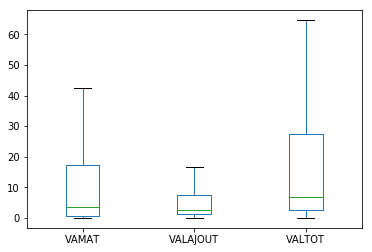

,VAMAT,VALAJOUT,VALTOT
count,31067.000000,31067.000000,31067.000000
mean,122.925028,71.520884,194.445912
std,532.884074,303.707643,819.256172
min,0.000000,0.000000,0.000000
25%,0.700000,1.170000,2.520000
50%,3.500000,2.670000,6.820000
75%,17.390000,7.370000,27.380000
max,15597.310000,5468.790000,20659.900000


In [148]:
priceset[['VAMAT', 'VALAJOUT', 'VALTOT']].plot.box(sym='')
plt.show()
priceset[['VAMAT', 'VALAJOUT', 'VALTOT']].describe()

In [149]:
#Nothing is free !!
priceset = priceset[priceset['VAMAT']>0.1]
priceset = priceset[priceset['VALAJOUT']>0.1]
priceset = priceset[priceset['VALTOT']>0.1]

In [150]:
# and nothing should be more expensive than ... euros...
priceset = priceset[priceset['VAMAT']<200]
priceset = priceset[priceset['VALAJOUT']<200]
priceset = priceset[priceset['VALTOT']<200]

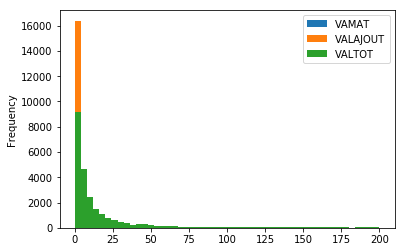

In [151]:
priceset[['VAMAT', 'VALAJOUT', 'VALTOT']].plot.hist(bins = 50)
plt.show()

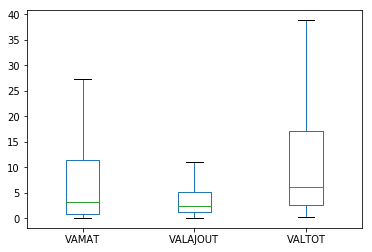

,VAMAT,VALAJOUT,VALTOT
count,24093.000000,24093.000000,24093.000000
mean,11.546608,6.363386,17.909993
std,21.864005,12.581329,30.891966
min,0.110000,0.110000,0.240000
25%,0.920000,1.250000,2.660000
50%,3.230000,2.520000,6.190000
75%,11.440000,5.170000,17.160000
max,196.970000,149.510000,199.970000


In [152]:
priceset[['VAMAT', 'VALAJOUT', 'VALTOT']].plot.box(sym='')
plt.show()
priceset[['VAMAT', 'VALAJOUT', 'VALTOT']].describe()

# Data preparation

In [153]:
#Project number extraction
dataset = dataset.reset_index()
dataset['project'] = dataset['index'].apply(lambda x: x[1:3])
dataset['COART'] = dataset['index'].apply(lambda x: x.split('_')[0].upper()[:8])
mask = dataset['COART'].duplicated(keep='last')
print('Number of dupplicates : ', dataset[mask].shape[0])
dataset.set_index('COART', inplace=True)
dataset.head()

Number of dupplicates :  0


,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,...,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,radius_approx,bend_edge_distance,bend_edge_angle,bend_edge_length,project
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,l1600360_flat1,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,...,NaN,"[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...",True,"[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,...",16
L1600470,l1600470_flat1,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,...,NaN,[],[],[],[],False,[],[],[],16
L1600600,l1600600_flat1,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,...,NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1519.0, 1519.0]",True,"[[216.174, 121.89999999999999, 0.8649999999999...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1509.0, 94.274, 118.44, 129.276, 1509.0, 129...",16
L1600610,l1600610_flat1,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,...,NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1280.0, 1280.0]",True,"[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1270.0, 94.274, 118.44, 129.276, 1270.0, 129...",16
L1600620,l1600620_flat1,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,...,NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1150.0, 1150.0]",True,"[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1140.0, 94.274, 118.44, 129.276, 1140.0, 129...",16


## Bend features creation

In [154]:
# Conversion from strings to bends
toconvert = ['bend_radius', 'bend_angle', 'bend_direction', 'deformation_length',
            'bend_bend_distance', 'bend_bend_angle', 'merged_bend', 'punch_length', 'bend_edge_distance',
            'bend_edge_angle', 'bend_edge_length']

def convert2array(entry):
    text = entry.replace('nan', '"nan"')
    try:
        return literal_eval(text if text != '"nan"' else [])
    except:
        return 'Error'


for convert in toconvert:
    try:
        print(convert, 'converted')
        dataset[convert] = dataset[convert].apply(convert2array)
    except:
        print(convert, 'NOT converted')
    
dataset[toconvert].head()

bend_radius converted
bend_angle converted
bend_direction converted
deformation_length converted
bend_bend_distance converted
bend_bend_angle converted
merged_bend converted
punch_length converted
bend_edge_distance converted
bend_edge_angle converted
bend_edge_length converted


,bend_radius,bend_angle,bend_direction,deformation_length,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length
COART,,,,,,,,,,,
L1600360,"[5.0, 5.0, 5.0, 5.0, 5.0]","[20.0, 77.3, 40.0, 20.0, 90.0]","[DOWN, DOWN, DOWN, DOWN, DOWN]","[276.78907664300004, 661.9399541592159, 661.93...","[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...","[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,..."
L1600470,[],[],[],[],[],[],[],[],[],[],[]
L1600600,"[4.0, 4.0]","[20.0, 30.0]","[DOWN, DOWN]","[1509.0, 1509.0]","[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1519.0, 1519.0]","[[216.174, 121.89999999999999, 0.8649999999999...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1509.0, 94.274, 118.44, 129.276, 1509.0, 129..."
L1600610,"[4.0, 4.0]","[20.0, 30.0]","[DOWN, DOWN]","[1270.0, 1270.0]","[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1280.0, 1280.0]","[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1270.0, 94.274, 118.44, 129.276, 1270.0, 129..."
L1600620,"[4.0, 4.0]","[20.0, 30.0]","[DOWN, DOWN]","[1140.0, 1140.0]","[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1150.0, 1150.0]","[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1140.0, 94.274, 118.44, 129.276, 1140.0, 129..."


In [155]:
#Verification that we have no error
dataset[dataset['deformation_length'] == 'Error']

,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,...,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,radius_approx,bend_edge_distance,bend_edge_angle,bend_edge_length,project
COART,,,,,,,,,,,,,,,,,,,,,


In [157]:
#Calculate the number of bends with different radius
dataset['radius_count'] = dataset['bend_radius'].apply(lambda x: len(set(x)))
dataset['direction_count'] = dataset['bend_direction'].apply(lambda x: len(set(x)))
dataset.head()

,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,...,bend_bend_angle,merged_bend,punch_length,radius_approx,bend_edge_distance,bend_edge_angle,bend_edge_length,project,radius_count,direction_count
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,l1600360_flat1,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,...,"[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...",True,"[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,...",16,1,1
L1600470,l1600470_flat1,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,...,[],[],[],False,[],[],[],16,0,0
L1600600,l1600600_flat1,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,...,"[[-0.0], [0.0]]","[0, 0]","[1519.0, 1519.0]",True,"[[216.174, 121.89999999999999, 0.8649999999999...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1509.0, 94.274, 118.44, 129.276, 1509.0, 129...",16,1,1
L1600610,l1600610_flat1,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,...,"[[-0.0], [0.0]]","[0, 0]","[1280.0, 1280.0]",True,"[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1270.0, 94.274, 118.44, 129.276, 1270.0, 129...",16,1,1
L1600620,l1600620_flat1,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,...,"[[-0.0], [0.0]]","[0, 0]","[1150.0, 1150.0]",True,"[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1140.0, 94.274, 118.44, 129.276, 1140.0, 129...",16,1,1


highest number of bend observed on dataset  20
count    10454.000000
mean         1.123302
std          1.579733
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         20.000000
Name: bend_count, dtype: float64


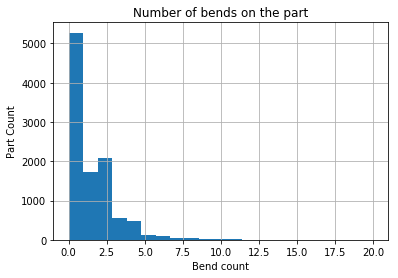

In [158]:
#Maximum number of bends
dataset['bend_count'] = dataset['bend_radius'].apply(lambda x: len(x))
maxnumbend = dataset['bend_count'].max()
print('highest number of bend observed on dataset ', maxnumbend)
print(dataset['bend_count'].describe())
dataset['bend_count'].plot.hist(bins=21)
plt.title('Number of bends on the part')
plt.xlabel('Bend count')
plt.ylabel('Part Count')
plt.grid(True)
#plt.show()

In [159]:
# UP-DOWN conversion
dataset['bend_direction'] = dataset['bend_direction'].apply(lambda cell: [1 if x=='UP' else -1 for x in cell])
dataset[['bend_direction']].head()

,bend_direction
COART,
L1600360,"[-1, -1, -1, -1, -1]"
L1600470,[]
L1600600,"[-1, -1]"
L1600610,"[-1, -1]"
L1600620,"[-1, -1]"


In [160]:
#Definition othe number of bends to consider
bendcount = 10 #Max 2 digits, pythonic count

In [162]:
#Bends unpacking

toconvert_l2 = ['bend_bend_distance', 'bend_bend_angle', 'bend_edge_distance', 'bend_edge_angle', 'bend_edge_length']

#Unpack first level
for index in range(bendcount):
    for bend_info in toconvert:
        dataset['{}_{:02d}'.format(bend_info, index)] = dataset[bend_info].apply(lambda x: x[index] if len(x)>=index+1 else [])

#Create the list of second level
tounpack = []
for index in range(bendcount):
    tounpack.extend(['{}_{:02d}'.format(x, index) for x in toconvert_l2])    
    
for column in tounpack:
    index = int(column[-2:])
    rootname = column[:-3]
    dataset['{}_mean_{:02d}'.format(rootname, index)] = dataset[column].apply(lambda x: np.nanmean(x) if len(x) !=0 else [])
    dataset['{}_std_{:02d}'.format(rootname, index)]  = dataset[column].apply(lambda x: np.nanstd(x) if len(x) !=0 else [])
    dataset['{}_min_{:02d}'.format(rootname, index)]  = dataset[column].apply(lambda x: np.nanmin(x) if len(x) !=0 else [])
    dataset['{}_max_{:02d}'.format(rootname, index)]  = dataset[column].apply(lambda x: np.nanmax(x) if len(x) !=0 else [])

dataset = dataset.drop(tounpack, axis=1)
print(dataset.shape)
dataset.head()


(10454, 290)


,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,...,bend_edge_distance_min_09,bend_edge_distance_max_09,bend_edge_angle_mean_09,bend_edge_angle_std_09,bend_edge_angle_min_09,bend_edge_angle_max_09,bend_edge_length_mean_09,bend_edge_length_std_09,bend_edge_length_min_09,bend_edge_length_max_09
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,l1600360_flat1,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,...,[],[],[],[],[],[],[],[],[],[]
L1600470,l1600470_flat1,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,...,[],[],[],[],[],[],[],[],[],[]
L1600600,l1600600_flat1,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,...,[],[],[],[],[],[],[],[],[],[]
L1600610,l1600610_flat1,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,...,[],[],[],[],[],[],[],[],[],[]
L1600620,l1600620_flat1,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,...,[],[],[],[],[],[],[],[],[],[]


In [164]:
#Shows the specs of just a bend
bend = 1
bend_col = [x for x in dataset.columns.values if x.endswith('_{:02d}'.format(bend))]
dataset[bend_col].head()

,bend_radius_01,bend_angle_01,bend_direction_01,deformation_length_01,merged_bend_01,punch_length_01,bend_bend_distance_mean_01,bend_bend_distance_std_01,bend_bend_distance_min_01,bend_bend_distance_max_01,...,bend_edge_distance_min_01,bend_edge_distance_max_01,bend_edge_angle_mean_01,bend_edge_angle_std_01,bend_edge_angle_min_01,bend_edge_angle_max_01,bend_edge_length_mean_01,bend_edge_length_std_01,bend_edge_length_min_01,bend_edge_length_max_01
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,5,77.3,-1,661.94,0,675.449,337.597,27.1523,299.308,373,...,4.32181,521.483,53.3849,39.574,1.21016e-05,128.738,140.043,163.737,29.0107,594.973
L1600470,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
L1600600,4,30,-1,1509,0,1519,120.602,0,120.602,120.602,...,1.297,250.742,67.5,38.9711,0,90,462.747,604.187,94.274,1509
L1600610,4,30,-1,1270,0,1280,120.602,0,120.602,120.602,...,1.297,250.742,67.5,38.9711,0,90,402.997,500.724,94.274,1270
L1600620,4,30,-1,1140,0,1150,120.602,0,120.602,120.602,...,1.297,250.742,67.5,38.9711,0,90,370.497,444.453,94.274,1140


# data assembly

In [165]:
# Index reset
dataset = dataset.reset_index()
priceset = priceset.reset_index()
print('dataset shape', dataset.shape)
print('priceset shape', priceset.shape)

dataset shape (10454, 291)
priceset shape (24093, 9)


In [166]:
#Data merge
Kset = pd.merge(dataset, priceset, on='COART', how='inner')
print(Kset.shape)
Kset.head()

(7699, 299)


,COART,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,...,bend_edge_length_min_09,bend_edge_length_max_09,VERSION,COSTE,TPPRX,DTPRP,VAMAT,VALAJOUT,VALIDDATE,VALTOT
0,L1600360,l1600360_flat1,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,...,[],[],VALIDE,K,K,201710,12.51,5.15,2017-10-01,17.66
1,L1600470,l1600470_flat1,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,...,[],[],VALIDE,K,K,201710,0.25,0.92,2017-10-01,1.17
2,L1600600,l1600600_flat1,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,...,[],[],VALIDE,K,K,201710,18.36,7.55,2017-10-01,25.91
3,L1600610,l1600610_flat1,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,...,[],[],VALIDE,K,K,201710,9.18,4.77,2017-10-01,13.95
4,L1600620,l1600620_flat1,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,...,[],[],VALIDE,K,K,201710,9.18,4.65,2017-10-01,13.83


In [167]:
#Many cost are missing...
import csv
missing = [coart for coart in dataset['COART'].tolist() if coart not in Kset['COART'].tolist()]
print(len(missing)," missing codes articles, saved in a local file")
if len(missing) >0:
    with open('missing_coart.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(missing)


2755  missing codes articles, saved in a local file


# Data cleaning

In [168]:
mask = Kset['thickness'].isna()
df=Kset[mask]
df=df['COART']
df.to_csv('missing_thickness.csv')
df.shape

(969,)

In [169]:
Kset = Kset.dropna(subset=['thickness'])
Kset.shape

(6730, 299)

## Volumique cost analysis

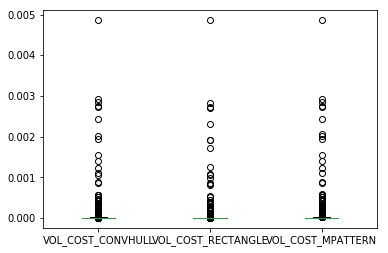

,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN
count,6.730000e+03,6.730000e+03,6.730000e+03
mean,1.533318e-05,1.291593e-05,1.784892e-05
std,1.102538e-04,1.027055e-04,1.126254e-04
min,7.745155e-07,7.448563e-07,7.750255e-07
25%,7.100802e-06,6.244493e-06,7.732048e-06
50%,8.455381e-06,6.829198e-06,9.929987e-06
75%,1.011219e-05,7.736968e-06,1.317614e-05
max,4.856682e-03,4.856679e-03,4.856682e-03


In [170]:
Kset['VOL_COST_CONVHULL'] = Kset['VAMAT'] / (Kset['convex_hull_area'] * Kset['thickness'])
Kset['VOL_COST_RECTANGLE'] = Kset['VAMAT'] / (Kset['minimum_rectangle_area'] * Kset['thickness'])
Kset['VOL_COST_MPATTERN'] = Kset['VAMAT'] / (Kset['no_hole_area'] * Kset['thickness'])

Kset[['VOL_COST_CONVHULL', 'VOL_COST_RECTANGLE', 'VOL_COST_MPATTERN']].plot.box()
plt.show()
Kset[['VOL_COST_CONVHULL', 'VOL_COST_RECTANGLE', 'VOL_COST_MPATTERN']].describe()

In [171]:
quantiles = Kset[['VOL_COST_CONVHULL', 'VOL_COST_RECTANGLE', 'VOL_COST_MPATTERN']].quantile([0.01, 0.25, 0.5, 0.75, 0.97])
quantiles

,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN
0.01,0.000005,0.000004,0.000005
0.25,0.000007,0.000006,0.000008
0.50,0.000008,0.000007,0.000010
0.75,0.000010,0.000008,0.000013
0.97,0.000018,0.000015,0.000027


In [172]:
#Suppression of all the ouliers (Top 1 % bottom, 3% Top)
for column in quantiles.columns.values:
    low = quantiles[column].iloc[0]
    high = quantiles[column].iloc[-1]
    Kset = Kset[Kset[column] > low]
    Kset = Kset[Kset[column] < high]

Kset.shape

(6324, 302)

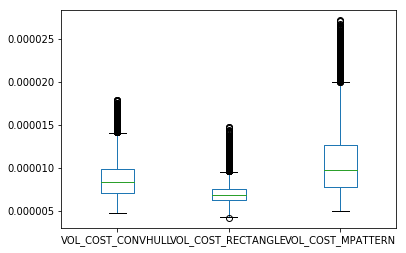

,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN
count,6324.000000,6324.000000,6324.000000
mean,0.000009,0.000007,0.000011
std,0.000002,0.000001,0.000004
min,0.000005,0.000004,0.000005
25%,0.000007,0.000006,0.000008
50%,0.000008,0.000007,0.000010
75%,0.000010,0.000008,0.000013
max,0.000018,0.000015,0.000027


In [173]:
Kset[['VOL_COST_CONVHULL', 'VOL_COST_RECTANGLE', 'VOL_COST_MPATTERN']].plot.box()
plt.show()
Kset[['VOL_COST_CONVHULL', 'VOL_COST_RECTANGLE', 'VOL_COST_MPATTERN']].describe()

In [174]:
#Possible imperfection no longer needed
Kset = Kset.drop('possible_imperfection', axis=1)

In [175]:
for index, nancount in Kset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

Done !


In [176]:
Kset.shape

(6324, 301)

In [177]:
Kset.columns.values

array(['COART', 'index', 'cut_length', 'num_closed_patterns',
       'num_open_patterns', 'total_area', 'minimum_rectangle_area',
       'minimum_rectangle_dim1', 'minimum_rectangle_dim2',
       'convex_hull_area', 'no_hole_area', 'thickness', 'unit',
       'material', 'bend_radius', 'bend_angle', 'bend_direction',
       'deformation_length', 'bend_bend_distance', 'bend_bend_angle',
       'merged_bend', 'punch_length', 'radius_approx',
       'bend_edge_distance', 'bend_edge_angle', 'bend_edge_length',
       'project', 'radius_count', 'direction_count', 'bend_count',
       'bend_radius_00', 'bend_angle_00', 'bend_direction_00',
       'deformation_length_00', 'merged_bend_00', 'punch_length_00',
       'bend_radius_01', 'bend_angle_01', 'bend_direction_01',
       'deformation_length_01', 'merged_bend_01', 'punch_length_01',
       'bend_radius_02', 'bend_angle_02', 'bend_direction_02',
       'deformation_length_02', 'merged_bend_02', 'punch_length_02',
       'bend_radius_03', 

# Data exploration

In [179]:
Kset=Kset.reset_index()

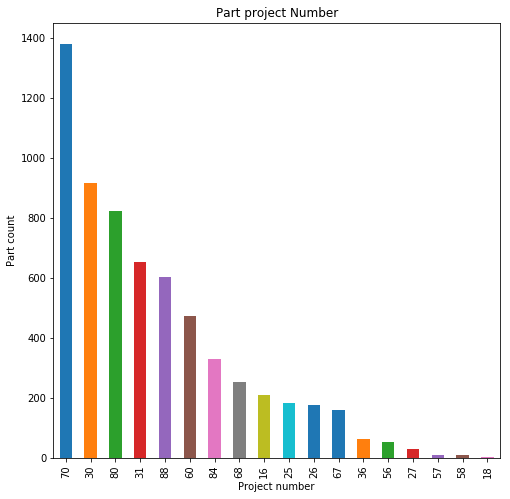

In [180]:
#Project proportion
df = Kset.groupby('project')['COART'].count()
df = df.sort_values(ascending=False)
df.plot.bar(figsize=(8,8))
plt.title("Part project Number")
plt.xlabel('Project number')
plt.ylabel('Part count')
plt.show()

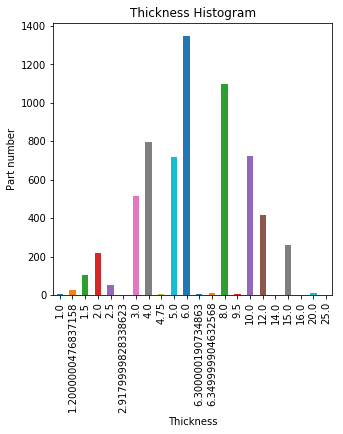

In [181]:
#Thickness proportion
from matplotlib.ticker import FormatStrFormatter
df = Kset.groupby('thickness')['COART'].count()
df = df.sort_index()
fig, ax = plt.subplots()
df.plot.bar(figsize=(5,5))
plt.title('Thickness Histogram')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xlabel('Thickness')
plt.ylabel('Part number')
plt.show()

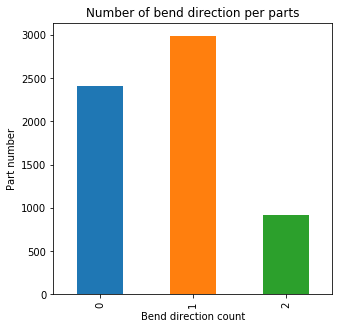

In [182]:
# Bend direction
df = Kset.groupby('direction_count')['COART'].count()
df = df.sort_index()
df.plot.bar(figsize=(5,5))
plt.title('Number of bend direction per parts')
plt.xlabel('Bend direction count')
plt.ylabel('Part number')
plt.show()

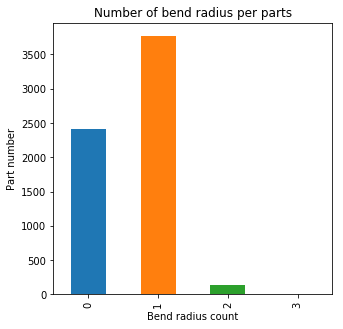

In [183]:
# Bend direction
df = Kset.groupby('radius_count')['COART'].count()
df = df.sort_index()
df.plot.bar(figsize=(5,5))
plt.title('Number of bend radius per parts')
plt.xlabel('Bend radius count')
plt.ylabel('Part number')
plt.show()

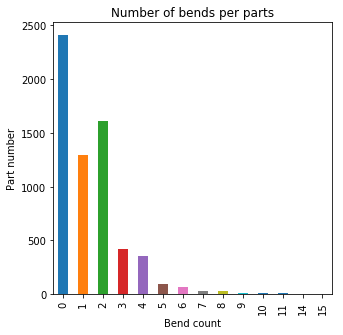

In [184]:
# direction
df = Kset.groupby('bend_count')['COART'].count()
df = df.sort_index()
df.plot.bar(figsize=(5,5))
plt.title('Number of bends per parts')
plt.xlabel('Bend count')
plt.ylabel('Part number')
plt.show()

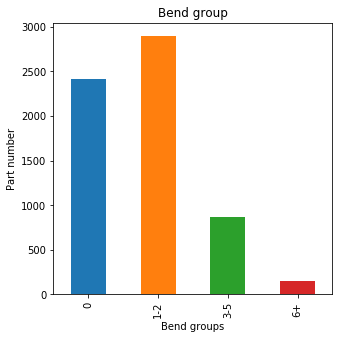

In [185]:
# Bend group creation
def bendgroupcalc(entry):
    if entry == 0:
        return '0'
    elif entry <= 2:
        return '1-2'
    elif entry <= 5:
        return '3-5'
    else:
        return '6+'
    return 'None'

Kset['bend_group'] = Kset['bend_count'].apply(bendgroupcalc)

# direction
df = Kset.groupby('bend_group')['COART'].count()
df.plot.bar(figsize=(5,5))
plt.title('Bend group')
plt.xlabel('Bend groups')
plt.ylabel('Part number')
plt.show()

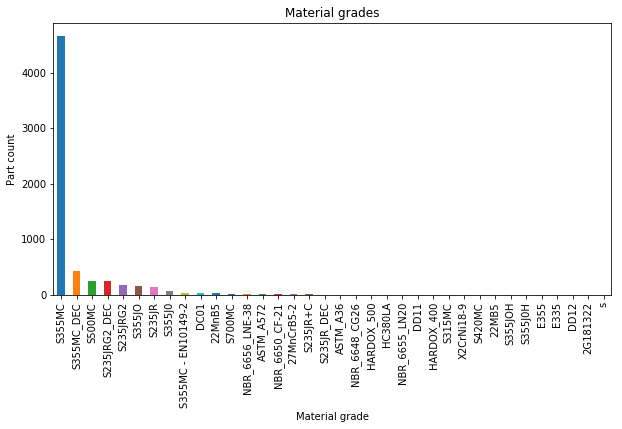

,index
material,
S355MC,4659
S355MC_DEC,435
S500MC,254
S235JRG2_DEC,240
S235JRG2,172
S355JO,158
S235JR,145
S355J0,66
S355MC - EN10149-2,37


In [186]:
#Materials
df=Kset[['material']].reset_index().groupby('material').count()
df = df.sort_values('index', ascending=False)
df['index'].plot.bar(legend=None, figsize=(10,5))
plt.title('Material grades')
plt.xlabel('Material grade')
plt.ylabel('Part count')
plt.show()
df

In [187]:
#Only S355MC kept
Kset = Kset[Kset['material'] == 'S355MC']
Kset.shape

(4659, 303)

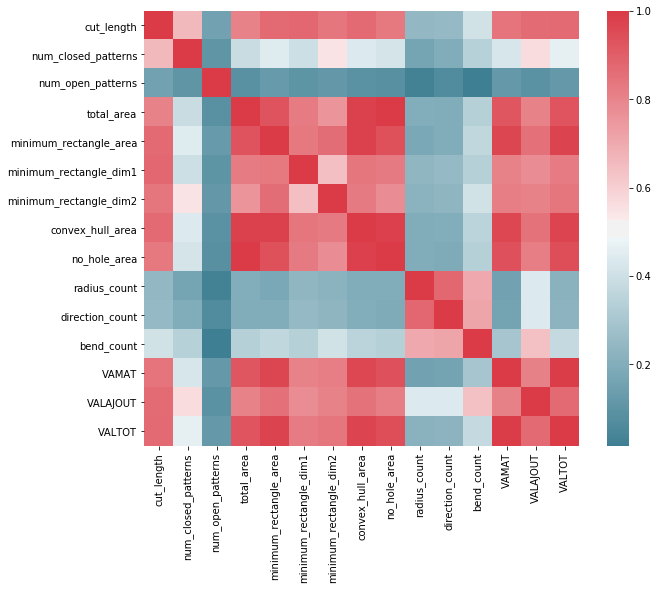

In [188]:


df = Kset[Kset['thickness'] == 6]

tocorr = ['cut_length', 'num_closed_patterns',
       'num_open_patterns', 'total_area', 'minimum_rectangle_area',
       'minimum_rectangle_dim1', 'minimum_rectangle_dim2',
       'convex_hull_area', 'no_hole_area', 'radius_count', 'direction_count', 'bend_count',
       'VAMAT', 'VALAJOUT', 'VALTOT', 
        #'thickness'
         ]

corr = df[tocorr].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

In [189]:
Kset[['thickness']].describe()

,thickness
count,4659.000000
mean,7.308972
std,2.970856
min,1.500000
25%,5.000000
50%,6.000000
75%,10.000000
max,20.000000


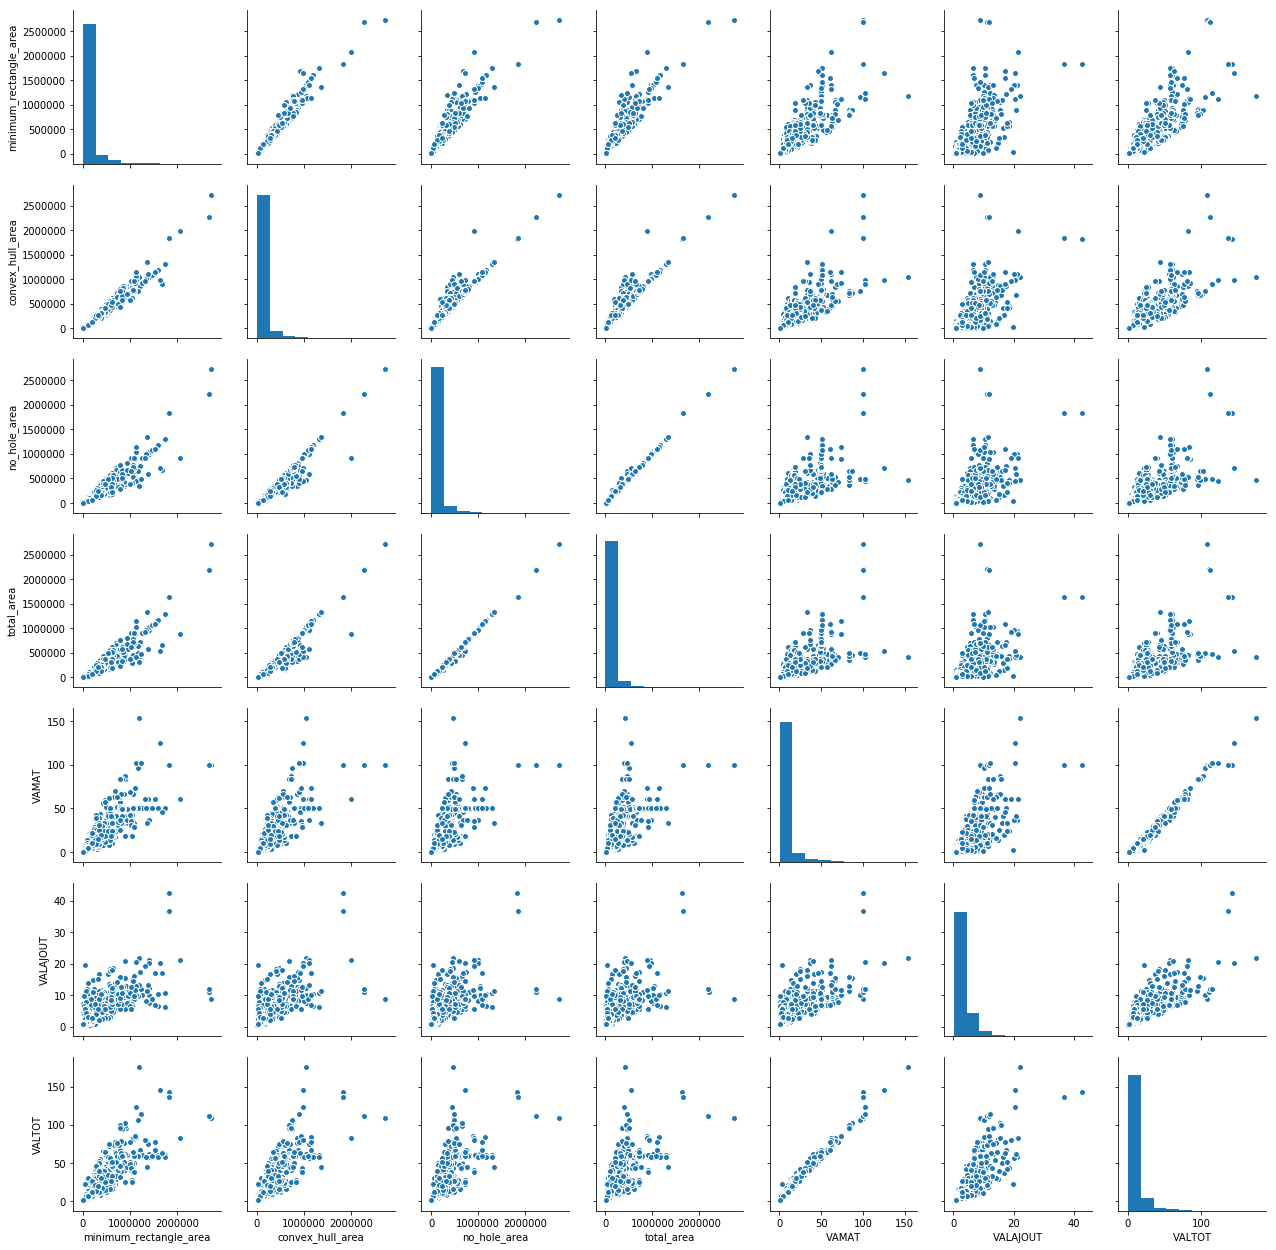

In [190]:
#Material aspect
toplot = [ 'minimum_rectangle_area', 'convex_hull_area', 'no_hole_area', 'total_area','VAMAT', 'VALAJOUT', 'VALTOT',]
sns.pairplot(Kset[toplot])
plt.show()

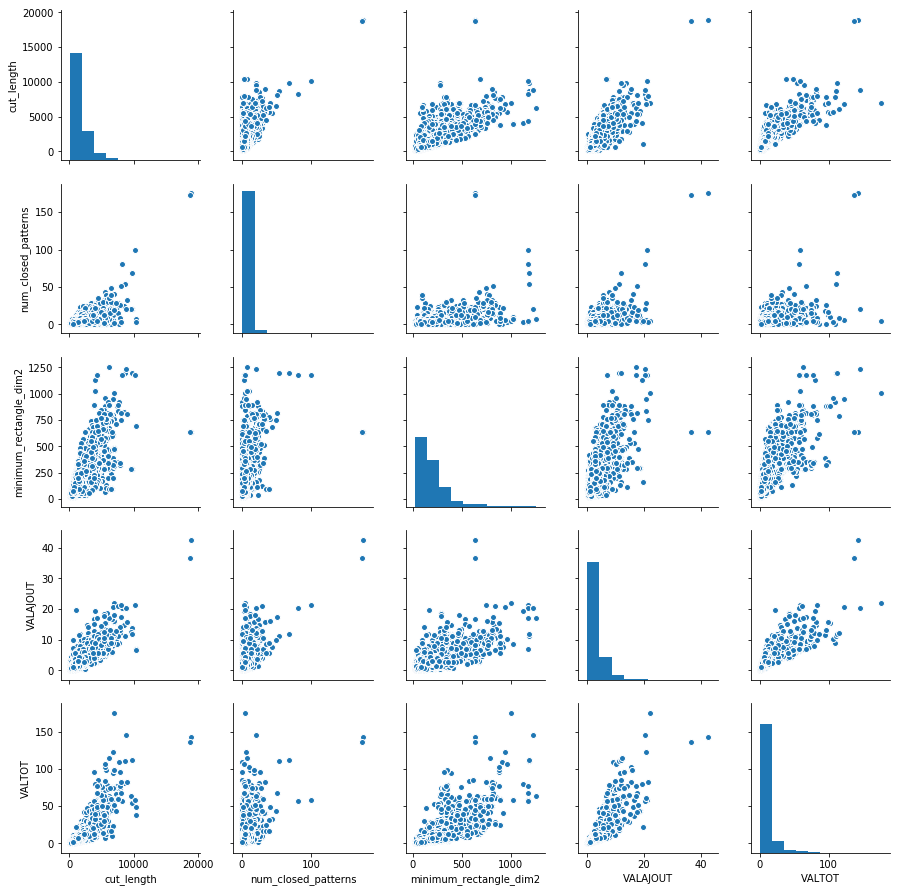

In [191]:
#Laser cut aspect
toplot = ['cut_length', 'num_closed_patterns', 'minimum_rectangle_dim2','VALAJOUT', 'VALTOT']
sns.pairplot(Kset[toplot])
plt.show()

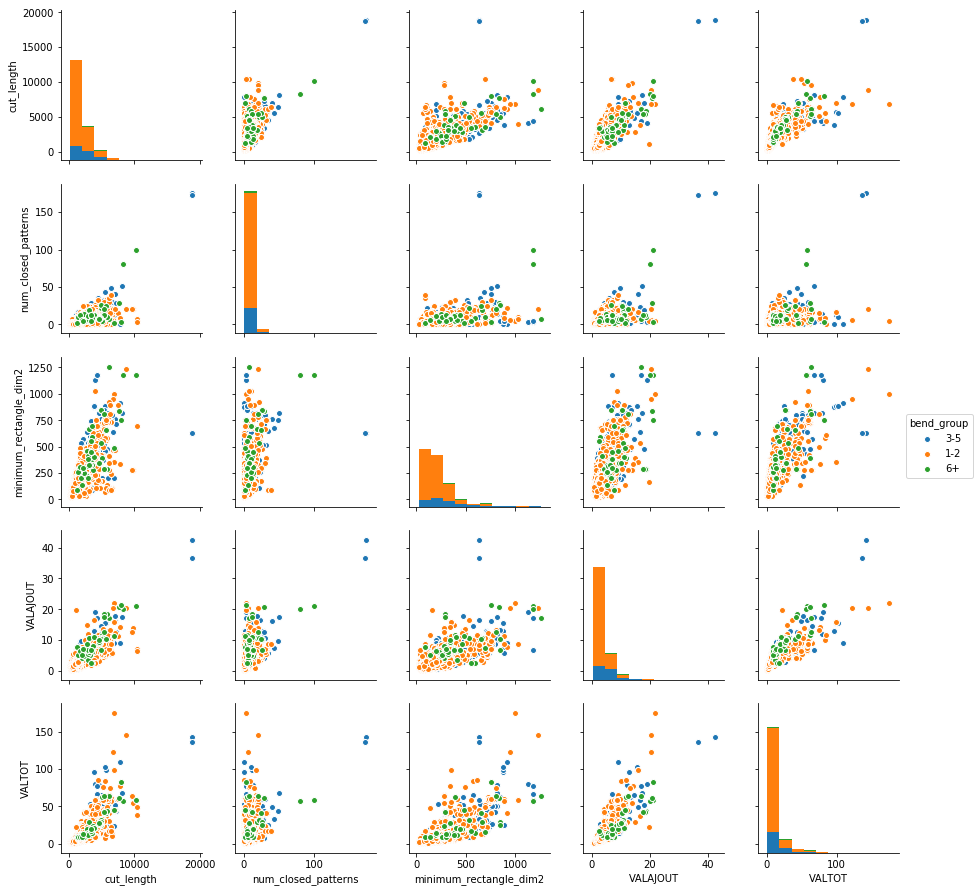

In [192]:
#bending aspect
df = Kset[Kset['bend_group'] != '0']
toplot = ['cut_length', 'num_closed_patterns', 'minimum_rectangle_dim2','VALAJOUT', 'VALTOT', 'bend_group']
sns.pairplot(df[toplot], hue = 'bend_group')
plt.show()

In [193]:
Kset.shape

(4659, 303)

In [194]:
Kset.set_index('COART', inplace=True)


# Cleaned dataset saving - Version Z2

In [195]:
startcol = Kset.columns.values
todrop = ['index', 'level_0', 'unit', 'material', 'bend_radius', 'bend_angle', 'bend_direction', 'deformation_length', 'bend_bend_distance',
          'bend_bend_angle', 'merged_bend', 'punch_length', 'bend_edge_distance', 'bend_edge_angle',
          'bend_edge_length', 'project', 'VERSION', 'COSTE', 'TPPRX', 'DTPRP', 'VALIDDATE',
         ]

tokeep = [x for x in startcol if x not in todrop]
tokeep

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'thickness',
 'radius_approx',
 'radius_count',
 'direction_count',
 'bend_count',
 'bend_radius_00',
 'bend_angle_00',
 'bend_direction_00',
 'deformation_length_00',
 'merged_bend_00',
 'punch_length_00',
 'bend_radius_01',
 'bend_angle_01',
 'bend_direction_01',
 'deformation_length_01',
 'merged_bend_01',
 'punch_length_01',
 'bend_radius_02',
 'bend_angle_02',
 'bend_direction_02',
 'deformation_length_02',
 'merged_bend_02',
 'punch_length_02',
 'bend_radius_03',
 'bend_angle_03',
 'bend_direction_03',
 'deformation_length_03',
 'merged_bend_03',
 'punch_length_03',
 'bend_radius_04',
 'bend_angle_04',
 'bend_direction_04',
 'deformation_length_04',
 'merged_bend_04',
 'punch_length_04',
 'bend_radius_05',
 'bend_angle_05',
 'bend_direction_05',
 'deformation_length_05',
 'merged_bend_05

In [196]:
Kset[tokeep].to_csv('../Y3 - Sample data/Z2 - datasetprepclean.csv')

# Cleaned dataset saving - Version Z3

Thichness converted in categories

In [197]:
dum = pd.get_dummies(Kset['thickness'],prefix = 'thick')
df = pd.concat([Kset, dum], axis=1)
df.head()

,level_0,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,...,thick_2.0,thick_3.0,thick_4.0,thick_5.0,thick_6.0,thick_8.0,thick_10.0,thick_12.0,thick_15.0,thick_20.0
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,0,l1600360_flat1,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,...,0,0,1,0,0,0,0,0,0,0
L1600470,1,l1600470_flat1,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,...,0,0,0,0,0,0,1,0,0,0
L1600700,5,l1600700_flat1,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,...,0,0,0,0,0,0,1,0,0,0
L1600710,6,l1600710_flat1,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,...,0,0,0,0,0,0,1,0,0,0
L1605790,30,l1605790_flat1,2535.909668,5,0,184134.328125,355747.34375,826.389404,430.483917,230244.703125,...,0,0,0,1,0,0,0,0,0,0


In [198]:
startcol = df.columns.values
todrop = ['index', 'level_0', 'unit', 'material', 'bend_radius', 'bend_angle', 'bend_direction', 'deformation_length', 'bend_bend_distance',
          'bend_bend_angle', 'merged_bend', 'punch_length', 'bend_edge_distance', 'bend_edge_angle',
          'bend_edge_length', 'project', 'VERSION', 'COSTE', 'TPPRX', 'DTPRP', 'VALIDDATE', 'VOL_COST_CONVHULL',
          'VOL_COST_RECTANGLE', 'VOL_COST_MPATTERN'
         ]

tokeep = [x for x in startcol if x not in todrop]
tokeep

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'thickness',
 'radius_approx',
 'radius_count',
 'direction_count',
 'bend_count',
 'bend_radius_00',
 'bend_angle_00',
 'bend_direction_00',
 'deformation_length_00',
 'merged_bend_00',
 'punch_length_00',
 'bend_radius_01',
 'bend_angle_01',
 'bend_direction_01',
 'deformation_length_01',
 'merged_bend_01',
 'punch_length_01',
 'bend_radius_02',
 'bend_angle_02',
 'bend_direction_02',
 'deformation_length_02',
 'merged_bend_02',
 'punch_length_02',
 'bend_radius_03',
 'bend_angle_03',
 'bend_direction_03',
 'deformation_length_03',
 'merged_bend_03',
 'punch_length_03',
 'bend_radius_04',
 'bend_angle_04',
 'bend_direction_04',
 'deformation_length_04',
 'merged_bend_04',
 'punch_length_04',
 'bend_radius_05',
 'bend_angle_05',
 'bend_direction_05',
 'deformation_length_05',
 'merged_bend_05

In [199]:
df[tokeep].to_csv('../Y3 - Sample data/Z3 - datasetprepclean.csv')

# Cleaned dataset saving - Version Z3

In [250]:
df=Kset[['deformation_length']]
df['avg_deformation_length'] = df['deformation_length'].apply(lambda x: np.array(x, dtype='float64'))
df['avg_deformation_length'] = df['avg_deformation_length'].apply(lambda x: np.nanmean(x))
df = df.fillna(0)


/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


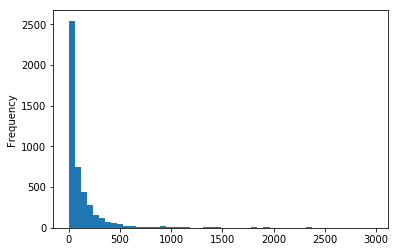

,avg_deformation_length
count,4659.000000
mean,124.974894
std,265.524487
min,0.000000
25%,0.000000
50%,46.303290
75%,143.306389
max,2970.000000


In [251]:
df['avg_deformation_length'].plot.hist(bins=50)
plt.show()
df[['avg_deformation_length']].describe()

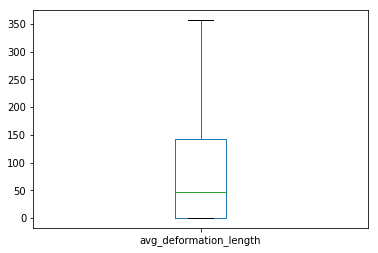

In [252]:
df['avg_deformation_length'].plot.box(sym='')

In [116]:
# ATTENTION AVEC CETTE CELLULE, A DEPALCER VERS LA FIN

#replacing all the empty brackets
for column in dataset.columns.values:
    dataset[column] = dataset[column].apply(lambda x: 0 if type(x)==list else x)